In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("C:/Users/safaa/OneDrive/Desktop/FIA TPs/DataSet-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", None)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [6]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [7]:
df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

C:\Users\safaa\AppData\Local\Temp\ipykernel_8396\1052578961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="viridis")


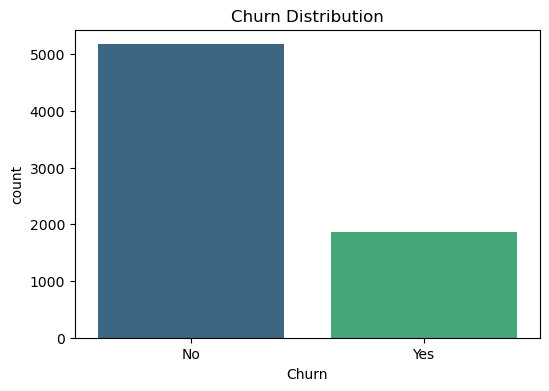

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="viridis")
plt.title("Churn Distribution")
plt.show()

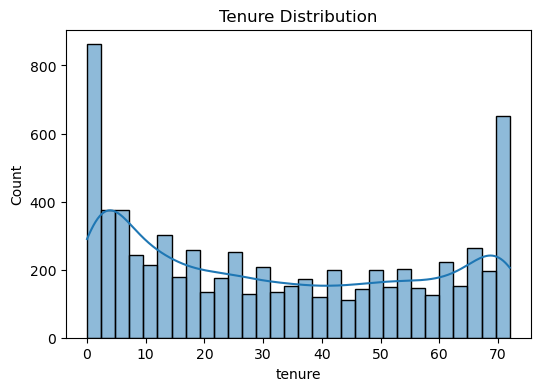

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], kde=True, bins=30)
plt.title("Tenure Distribution")
plt.show()

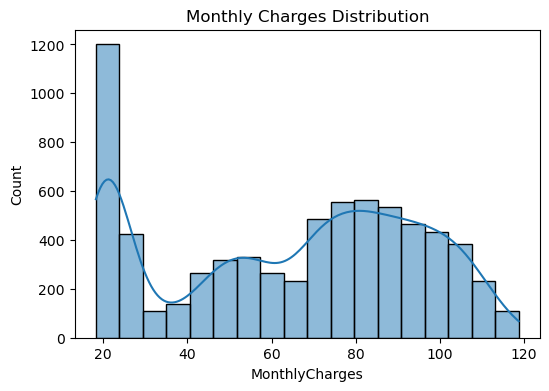

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

In [11]:
df.select_dtypes(include=np.number).head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


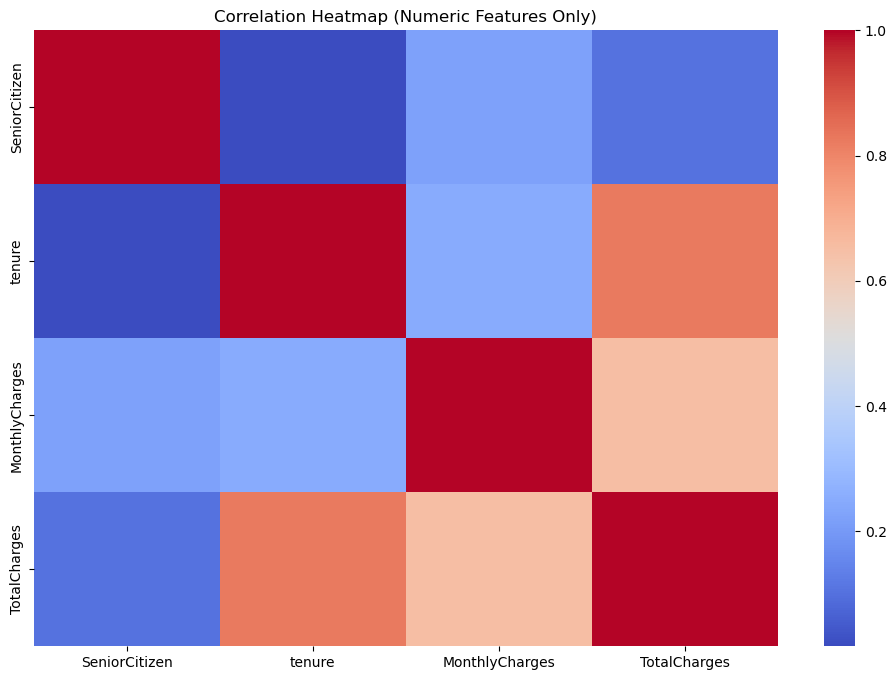

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [14]:
df_mi = df.copy()

df_mi_encoded = df_mi.apply(lambda col:
                            pd.factorize(col)[0] if col.dtype == 'object'
                            else col)

X_mi = df_mi_encoded.drop(columns=["Churn"], errors='ignore')
y_mi = df_mi_encoded["Churn"]


In [15]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)

mi_series = pd.Series(mi_scores, index=X_mi.columns)
mi_series = mi_series.sort_values(ascending=False)
mi_series


Contract            0.106637
tenure              0.077314
OnlineSecurity      0.062400
TechSupport         0.056425
InternetService     0.052555
DeviceProtection    0.049039
PaymentMethod       0.048573
MonthlyCharges      0.045263
TotalCharges        0.044603
OnlineBackup        0.044318
StreamingTV         0.036190
StreamingMovies     0.032192
PaperlessBilling    0.023871
Partner             0.012210
SeniorCitizen       0.008216
MultipleLines       0.006941
Dependents          0.005495
gender              0.004751
PhoneService        0.000581
customerID          0.000000
dtype: float64

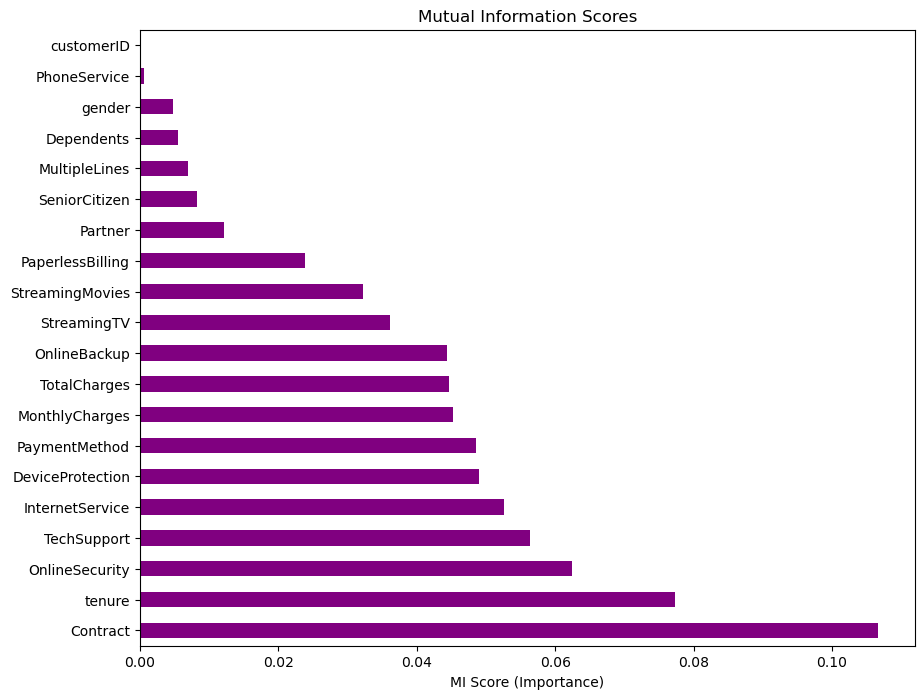

In [16]:
plt.figure(figsize=(10,8))
mi_series.plot(kind='barh', color='purple')
plt.title("Mutual Information Scores")
plt.xlabel("MI Score (Importance)")
plt.show()


In [19]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [20]:
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [21]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)


In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.20, random_state=42, stratify=y_train_full)


In [23]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [24]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])


In [25]:
preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [27]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")


In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, train_size=0.50, stratify=y_temp, random_state=42
)


In [30]:
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)


In [32]:
#Logistic regression :
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_prep, y_train)

y_pred_logreg = logreg.predict(X_test_prep)

print(" Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       776
           1       0.69      0.53      0.60       281

    accuracy                           0.81      1057
   macro avg       0.76      0.72      0.74      1057
weighted avg       0.80      0.81      0.80      1057

Accuracy: 0.8107852412488175


In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train_prep, y_train)

y_pred_tree = tree.predict(X_test_prep)

print(" Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


 Decision Tree Results:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       776
           1       0.62      0.59      0.61       281

    accuracy                           0.80      1057
   macro avg       0.74      0.73      0.73      1057
weighted avg       0.79      0.80      0.79      1057

Accuracy: 0.7965941343424787


In [35]:
#Random Forest :
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_prep, y_train)

y_pred_rf = rf.predict(X_test_prep)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       776
           1       0.67      0.43      0.52       281

    accuracy                           0.79      1057
   macro avg       0.74      0.67      0.69      1057
weighted avg       0.78      0.79      0.77      1057

Accuracy: 0.7909176915799432


In [36]:
# MLP ( Neural Network)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=500, random_state=42)

mlp.fit(X_train_prep, y_train)

y_pred_mlp = mlp.predict(X_test_prep)

print(" Neural Network Results:")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))


 Neural Network Results:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       776
           1       0.59      0.68      0.63       281

    accuracy                           0.79      1057
   macro avg       0.73      0.75      0.74      1057
weighted avg       0.80      0.79      0.79      1057

Accuracy: 0.7871333964049196


In [37]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_mlp)
    ]
}

pd.DataFrame(results)


,Model,Accuracy
0,Logistic Regression,0.810785
1,Decision Tree,0.796594
2,Random Forest,0.790918
3,Neural Network,0.787133
